In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(float)

In [8]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [9]:
y

array([5., 0., 4., ..., 4., 5., 6.], shape=(70000,))

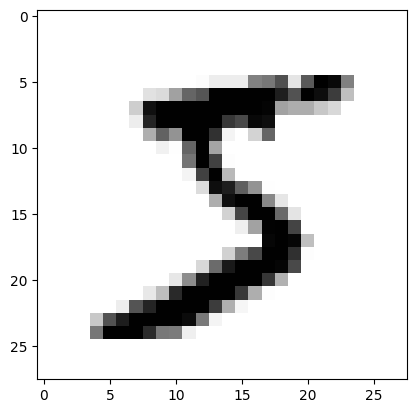

In [10]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
y_train_5 = (y_train == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  True
Classe predita pelo modelo:  [ True]


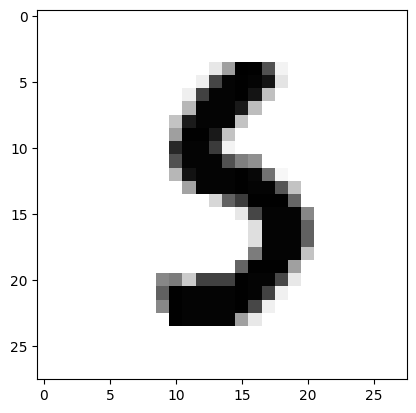

In [39]:
n = 10
plt.imshow(x_train[n].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96173626, 0.96301965, 0.96216249])

### A matriz de confusão

In [37]:
from sklearn.metrics import confusion_matrix

em uma matriz de confusão temos true negative, false negative, false positive e true positive

matriz de confusao = ([TN , FP], [FN , TP])

-> metrica de precisao = true positive / (true positive + false positive)

-> metrica de recall = true positive / (true positive + false negative)

-> f1 score = 2 * precisao * recall/ (precisao + recall)

In [41]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[43914,   676],
       [  674,  3736]])

In [42]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.8467815049864007
Recall:  0.8471655328798186


In [45]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, y_train_pred))
print(classification_report(y_train_5, y_train_pred))

[[43914   676]
 [  674  3736]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     44590
        True       0.85      0.85      0.85      4410

    accuracy                           0.97     49000
   macro avg       0.92      0.92      0.92     49000
weighted avg       0.97      0.97      0.97     49000



### Classificação multiclasse

In [46]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

array([5.])

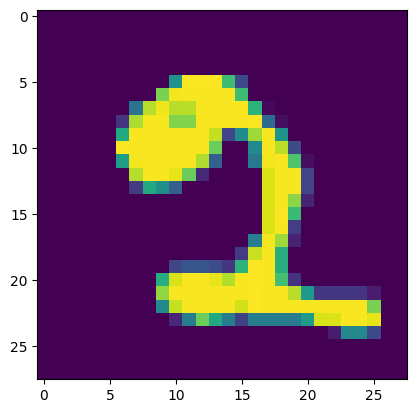

In [60]:
n = 0

digit = x_train[n]
plt.imshow(digit.reshape(28,28))
sgd_clf.predict([digit])

In [61]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [62]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4627    1   12   14    9   47   53    4   28   19]
 [   2 5384   55   12    8   30    9    9   68   12]
 [  92   71 4147  125   54   37  102   70  197   24]
 [  79   25  132 4040   16  364   26   66  127  116]
 [  37   28   22   11 4379   18   52   34   43  174]
 [ 122   14   24  135   67 3685   94   34  141   94]
 [  62   13   36    6   26   87 4550    3   35    2]
 [  28   25   57   37   61   19    5 4647   31  159]
 [  77   88   41  143   62  264   38   47 3789  209]
 [  56   23   12   63  259   88    3  362   48 3918]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93      4814
         1.0       0.95      0.96      0.96      5589
         2.0       0.91      0.84      0.88      4919
         3.0       0.88      0.81      0.84      4991
         4.0       0.89      0.91      0.90      4798
         5.0       0.79      0.84      0.81      4410
         6.0       0.92      0.94      0.93      4820
         7.0       0.88      0.92   

<Axes: >

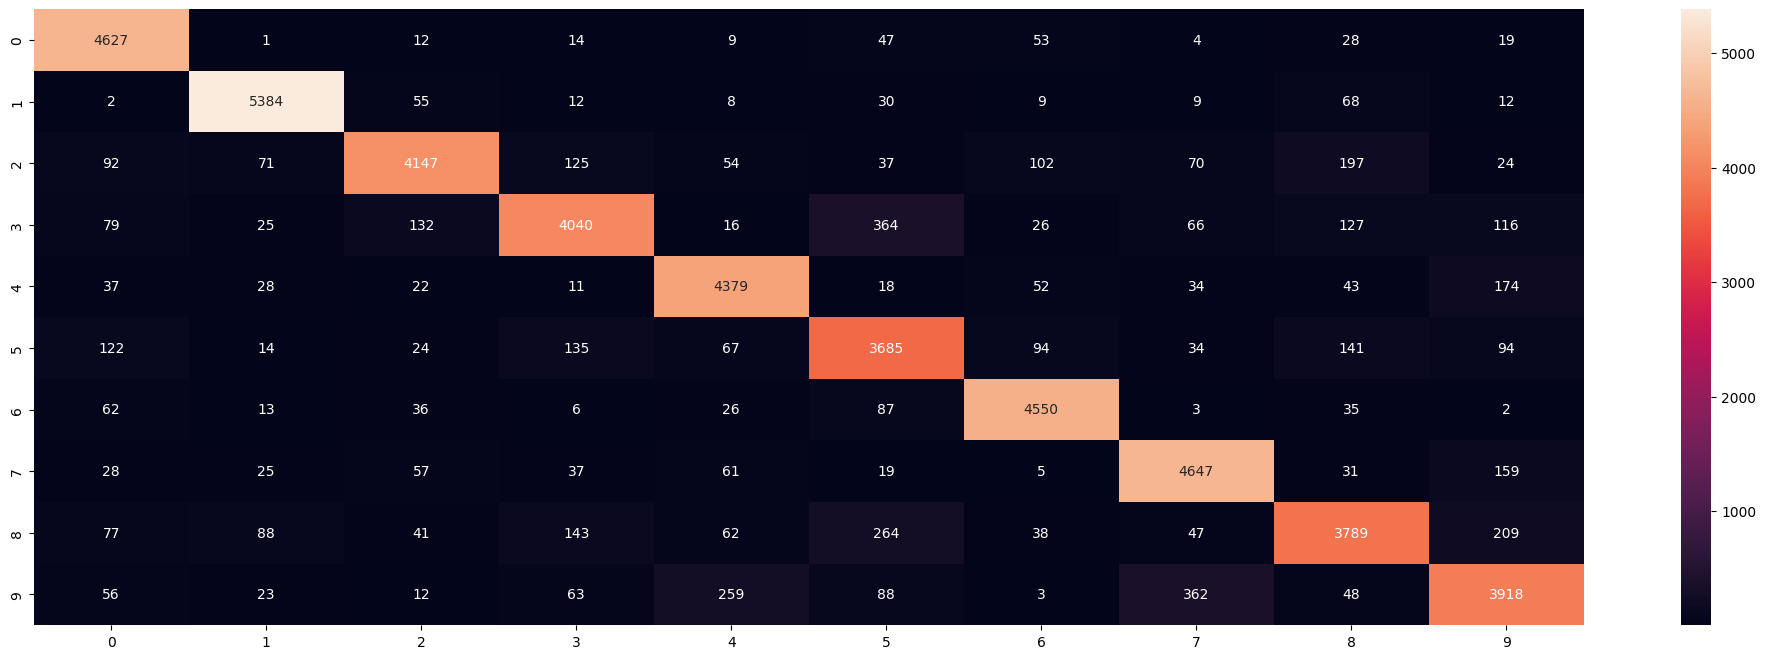

In [63]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<Axes: >

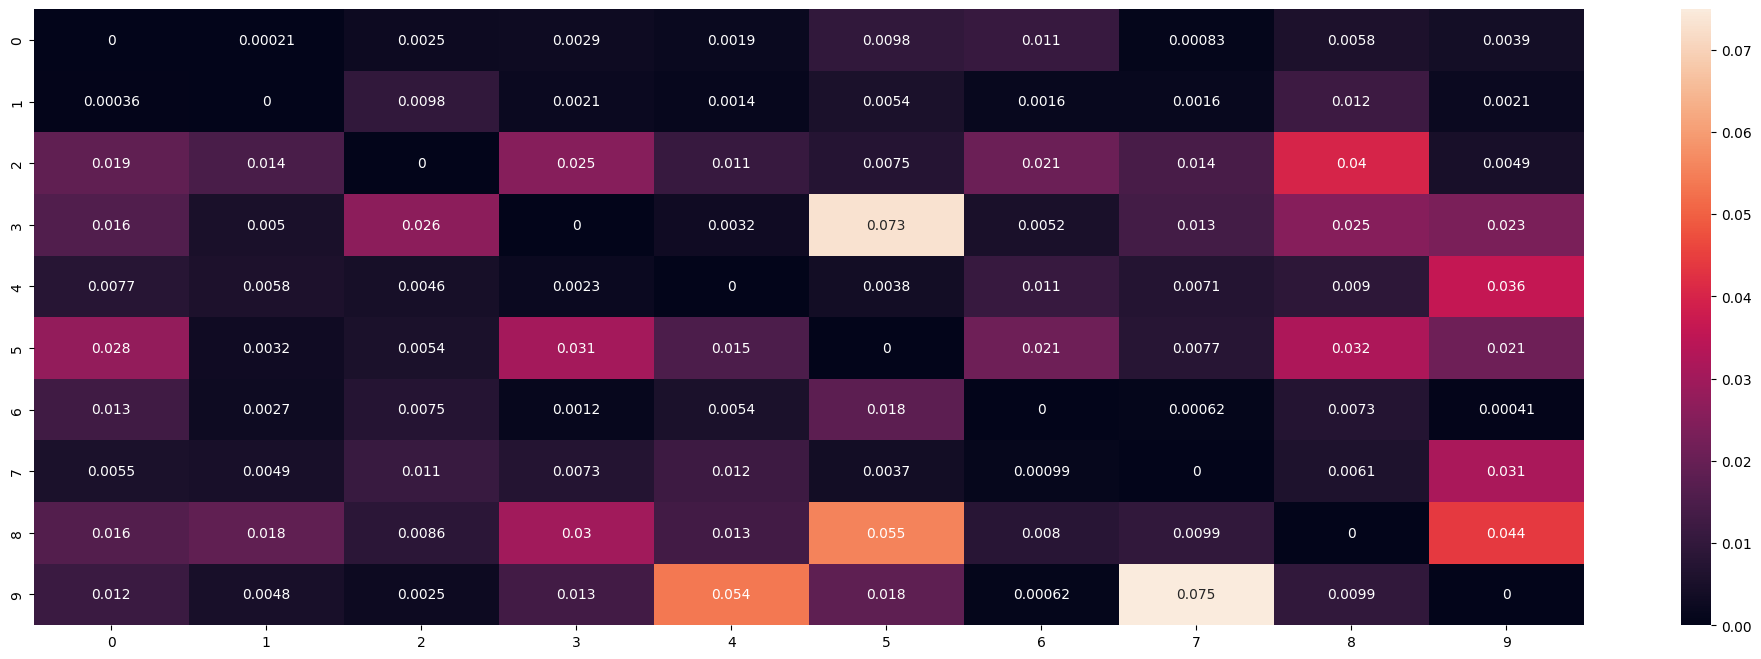

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

### classificação multilabel

In [66]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [69]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

array([[False,  True]])

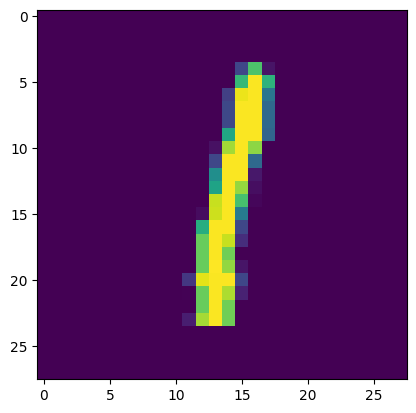

In [73]:
n = 3

digit = x_train[n]
plt.imshow(digit.reshape(28,28))

knn_clf.predict([digit])